# Effectiveness of Superbuy's Marketing Channels and Campaigns
Analysis by Andres Cojuangco <br>
August 17, 2023

### Objectives
- Understand effectiveness of marketing channels and campaigns
- Analyze customer behavior
- Identify opportunities for improvement

### Setting up Environment

In [1]:
# Import libraries
import pandas as pd 
import numpy as np
import os
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import math
import importlib
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from util import *

# Supress warnings from final output
import warnings
warnings.simplefilter('ignore')

# Set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Set path of file name
data_filename = 'Marketing Mock.csv'

# Check if the dataset file exists in the same directory as the script
if os.path.exists(data_filename):
    marketing_data_raw = pd.read_csv(data_filename)
else:
    print(f'Error: "{data_filename}" not found in the same directory as the script.')

### Assessment of Data

In [3]:
# Display marketing data (21569 rows)
marketing_data_raw.head(10)

,Associated Dates,Spend,Revenue,Visits,Impressions,Clicks,Conversions,Pageviews,Unique Visitors,UPO,Campaign Category,Ad Group,Ad Name,Last Touch Channel,Size,Color,Device,Subchannel,Campaign Name,Retail Tier,Retail Campaign Type,Video Spend,Video Impressions,Link Clicks,Engagements,Video Views,Video Completions
0,8/10/2020,237.503329,621.41,1597,49878,23,0.000000,4233,1353,1.3,General,Women's Clothing,Hooded Sweatshirt,Other,L,Blue,Tablet,other,NaN,NaN,NaN,0.000000,0,0,0,0,0
1,8/10/2020,896.281991,2306.10,895,11735,509,87.407960,1874,775,2.9,General,Outerwear,Beanie Hat,Social Media,M,Yellow,Desktop,paidsocial-branding,NaN,NaN,NaN,0.000000,0,0,0,0,0
2,8/10/2020,1.000000,3.14,1129,0,784,0.000000,2563,932,1.4,General,Outerwear,Beanie Hat,Video,L,Blue,Tablet,video-branding,NaN,NaN,NaN,199.772262,1,160,1,1313,1
3,8/10/2020,14.414175,41.70,2416,52611,1,0.000000,10823,1994,1.5,General,Women's Clothing,Men's Jacket,Social Media,XXL,Red,Tablet,paidsocial-prospecting,NaN,NaN,NaN,0.000000,0,0,0,0,0
4,8/10/2020,103.118295,356.07,1313,41847,1,396.391506,3750,1218,2.6,General,Men's Clothing,Beanie Hat,Social Media,S,Red,Mobile,paidsocial-branding,NaN,NaN,NaN,0.000000,0,0,0,0,0
5,8/10/2020,1.000000,2.91,1816,0,1095,0.000000,7450,1792,2.5,General,Men's Clothing,Denim Jeans,Email,XXL,Red,Tablet,affiliates,NaN,NaN,NaN,0.000000,0,0,0,0,0
6,8/10/2020,1142.209774,2305.50,2167,66928,1,138.038017,5900,2114,1.9,General,Men's Clothing,Beanie Hat,Paid Search,XL,Blue,Tablet,paidsearch-pmax,NaN,NaN,NaN,0.000000,0,0,0,0,0
7,8/10/2020,1.000000,1.79,859,0,17,0.000000,3769,826,1.3,General,Accessories,Workwear Pants,Other,XL,Blue,Mobile,other,NaN,NaN,NaN,0.000000,0,0,0,0,0
8,8/10/2020,1.000000,2.51,1406,147284,756,43.300154,6976,1194,1.2,General,Outerwear,Hooded Sweatshirt,Email,XXL,Black,Mobile,affiliates,NaN,NaN,NaN,0.000000,0,0,0,0,0
9,8/10/2020,258.717728,507.00,2092,15,1,97.189000,10597,1699,1.5,General,Men's Clothing,Denim Jeans,Video,XXL,Blue,Desktop,video-prospecting,NaN,NaN,NaN,1.000000,104784,252,1,1,1124


In [4]:
basic_info(marketing_data_raw)

This dataset has  27  columns and  21569  rows.
This dataset has  0  duplicated rows.
 
Descriptive statistics of the numeric features in the dataset: 
 
              Spend       Revenue        Visits    Impressions        Clicks  \
count  21569.000000  21569.000000  21569.000000   21569.000000  21569.000000   
mean     314.983371    786.511922   1626.661041   23386.598776    309.082109   
std      442.186412   1148.403675    727.345357   33183.479576    429.332079   
min        1.000000      1.500000    400.000000       0.000000      1.000000   
25%        1.000000      2.560000   1032.000000       0.000000      1.000000   
50%       40.220985     98.210000   1556.000000    2933.000000     48.000000   
75%      541.067079   1291.390000   2118.000000   39461.000000    531.000000   
max     3031.261975   8261.680000   3500.000000  204059.000000   2824.000000   

        Conversions     Pageviews  Unique Visitors           UPO  \
count  21569.000000  21569.000000     21569.000000  21569

#### Data Type Validation

In [5]:
# Check if types in each column are consistent
find_column_inconsistent(marketing_data_raw)

Column 'Campaign Name' has different data types: [<class 'float'> <class 'str'>]
Column 'Retail Tier' has different data types: [<class 'float'> <class 'str'>]
Column 'Retail Campaign Type' has different data types: [<class 'float'> <class 'str'>]


#### Categorical Values

In [6]:
# Select only categorical columns
categorical_columns = marketing_data_raw.select_dtypes(include=['object']).columns

# Get unique values for each categorical column
find_categorical_vals(marketing_data_raw, categorical_columns)

Column: Associated Dates
['8/10/2020' '8/11/2020' '8/12/2020' ... '8/7/2023' '8/8/2023' '8/9/2023']
-----
Column: Campaign Category
['General' 'Winter Clearance' 'Retail' 'Spring Essentials'
 'Summer Collection']
-----
Column: Ad Group
["Women's Clothing" 'Outerwear' "Men's Clothing" 'Accessories']
-----
Column: Ad Name
['Hooded Sweatshirt' 'Beanie Hat' "Men's Jacket" 'Denim Jeans'
 'Workwear Pants' "Women's Boots"]
-----
Column: Last Touch Channel
['Other' 'Social Media' 'Video' 'Email' 'Paid Search' 'Display']
-----
Column: Size
['L' 'M' 'XXL' 'S' 'XL']
-----
Column: Color
['Blue' 'Yellow' 'Red' 'Black' 'White' 'Green']
-----
Column: Device
['Tablet' 'Desktop' 'Mobile']
-----
Column: Subchannel
['other' 'paidsocial-branding' 'video-branding' 'paidsocial-prospecting'
 'affiliates' 'paidsearch-pmax' 'video-prospecting'
 'paidsocial-retargeting' 'paidsearch-nonbrand' 'display-retargeting'
 'paidsearch-brand' 'display-prospecting' 'paidsearch-retail'
 'paidsearch-local' 'paidsearch-shopp

#### Missing Values

In [7]:
# Gives percentages of missing values
missing_percentage = marketing_data_raw.isnull().mean() * 100
columns_with_missing = missing_percentage[missing_percentage > 0]
columns_with_missing


Campaign Name           84.213454
Retail Tier             84.213454
Retail Campaign Type    84.213454
dtype: float64

<AxesSubplot:>

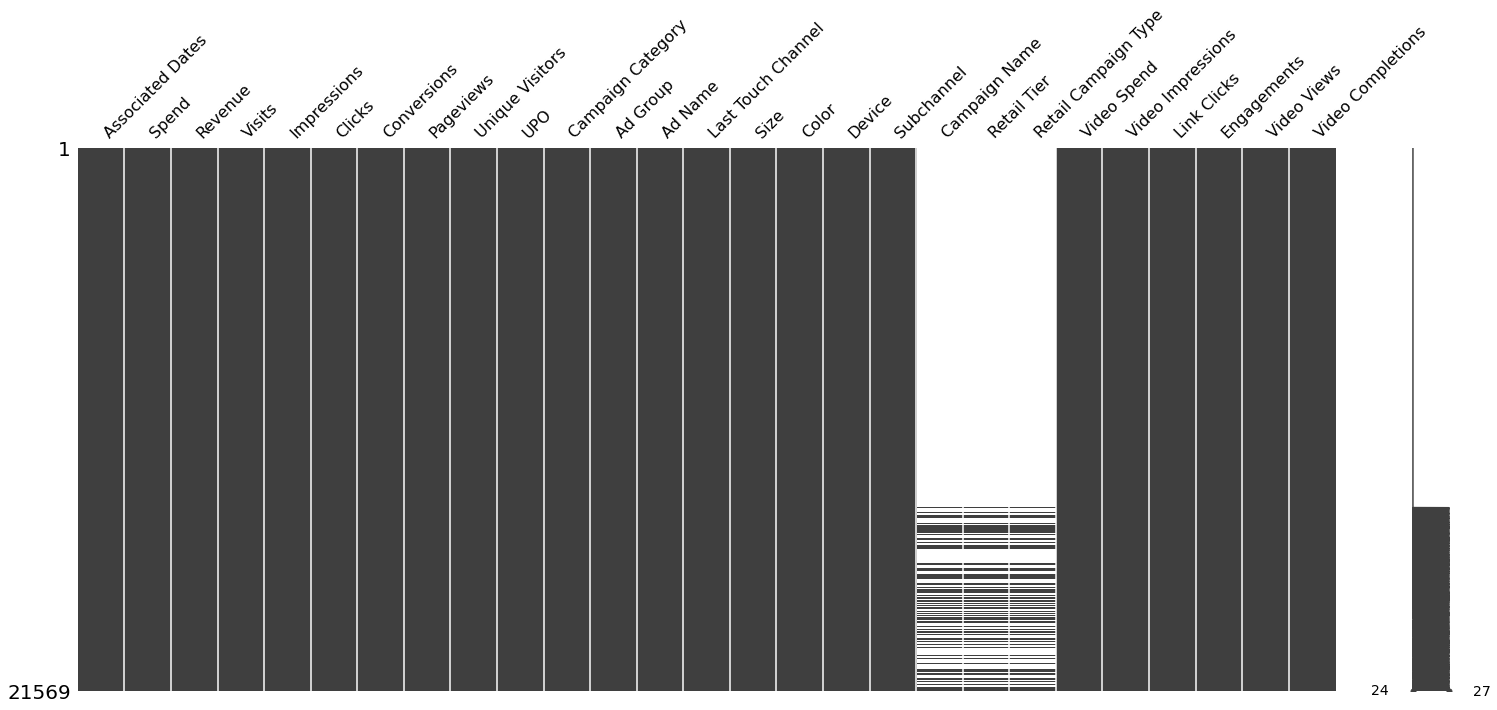

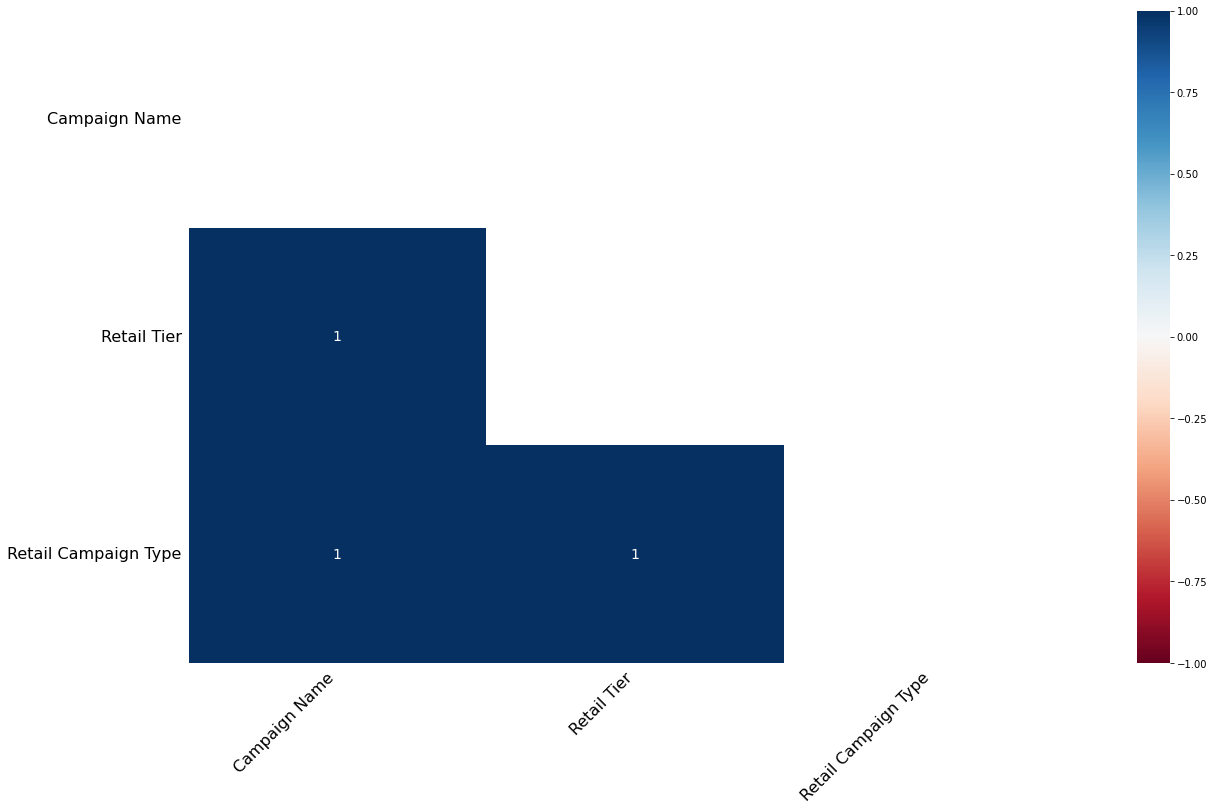

In [8]:
# Gives positional information of the missing values
msno.matrix(marketing_data_raw)

# Gives a heatmap of how missing values are related
msno.heatmap(marketing_data_raw)

#### Assessment Report

<b> Quality Issues: </b>
- Spend and video spend are not rounded to the correct decimal places to represent money format
- Conversions are float and not integers. Since conversions are a desired action, there should be no fractions

<b> Efficiency Issues: </b>
- columns have spaces and uppercase letter, can replace with ' ' w/ '_' to minimize errors and turn to lowercase
- associated dates can be changed to just dates 
- ad_name just refers to the product, ad_product is more straightforward 

<b> Missing Data: </b>
- 82.21% of campaign name, retail tier, retail campaign type are missing. If one of them are missing, all of them are missing in the same row

# Data Cleaning

In [9]:
# Make copy of data
marketing_data = marketing_data_raw

### Address Quality and Efficiency Issues  

In [10]:
# Change all column names to lowercase and replace '.' with '_'
marketing_data.columns = marketing_data.columns.str.lower().str.replace(' ', '_')

# Apply lowercase conversion to all string values
marketing_data = marketing_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Change associated dates to date and ad_name to ad_product
marketing_data.rename(columns={'associated_dates': 'date'}, inplace=True)
marketing_data.rename(columns={'ad_name': 'ad_product'}, inplace=True)

# Change conversions to integers
marketing_data['conversions'] = marketing_data['conversions'].astype(int)

# Round 'spend' and 'video_spend' to two decimal places and take the ceiling
marketing_data['spend'] = marketing_data['spend'].round(2)
marketing_data['video_spend'] = marketing_data['video_spend'].round(2)

In [11]:
# Test
marketing_data.sample(5)

,date,spend,revenue,visits,impressions,clicks,conversions,pageviews,unique_visitors,upo,campaign_category,ad_group,ad_product,last_touch_channel,size,color,device,subchannel,campaign_name,retail_tier,retail_campaign_type,video_spend,video_impressions,link_clicks,engagements,video_views,video_completions
14579,1/10/2023,104.94,188.68,3076,39328,1,319,18306,2697,1.9,winter clearance,women's clothing,denim jeans,display,xxl,red,tablet,display-prospecting,NaN,NaN,NaN,0.0,0,0,0,0,0
19772,6/14/2023,1.00,3.11,1669,47556,1,0,4322,1452,2.8,summer collection,women's clothing,women's boots,paid search,xl,blue,desktop,paidsearch-local,NaN,NaN,NaN,0.0,0,0,0,0,0
17082,3/28/2023,1.00,3.40,1061,106948,1,0,5453,1016,2.5,spring essentials,men's clothing,denim jeans,display,l,black,desktop,display-prospecting,NaN,NaN,NaN,0.0,0,0,0,0,0
17076,3/27/2023,1.00,2.37,1313,77573,264,0,4370,1236,2.7,retail,men's clothing,hooded sweatshirt,social media,m,yellow,mobile,paidsocial-prospecting,mall of america,tier 3,online,0.0,0,0,0,0,0
3261,3/1/2021,1.00,3.11,624,41367,90,0,3288,615,2.0,general,outerwear,denim jeans,video,xl,blue,desktop,video-prospecting,NaN,NaN,NaN,1.0,1,774,1,821,1460


### Address Missing Data

In [12]:
# Exploring ad_group and ad_product
marketing_data.groupby('ad_group')['ad_product'].value_counts()

ad_group          ad_product       
accessories       denim jeans          951
                  beanie hat           941
                  workwear pants       935
                  men's jacket         897
                  women's boots        884
                  hooded sweatshirt    868
men's clothing    hooded sweatshirt    914
                  denim jeans          885
                  women's boots        877
                  men's jacket         872
                  beanie hat           869
                  workwear pants       830
outerwear         women's boots        921
                  men's jacket         918
                  denim jeans          901
                  hooded sweatshirt    886
                  workwear pants       874
                  beanie hat           867
women's clothing  workwear pants       938
                  denim jeans          935
                  beanie hat           927
                  women's boots        898
                  

The ad groups do not align well with the product names. For example, men's jacket is under women's clothing group and women's boots are in the men's clothing group. We can create new ad groups so they relate to the products. If this were a real situation, I would make sure to consult the marketing team on the accuracy of the ad groups and names before making these kinds of changes. I am acting under assumption that there is no team and its just me.

In [13]:
# Assign new ad_groups
new_groups = {'denim jeans': 'pants', 'workwear pants': 'pants',
              'beanie hat': 'hats', "men's jacket": 'outerwear', 
              'hooded sweatshirt': 'outerwear', "women's boots": 'footwear'}

# Map values from the reference_column to replace values in the target_column
marketing_data['ad_group'] = marketing_data['ad_product'].map(new_groups)

In [14]:
# Test
marketing_data[['ad_group', 'ad_product']].sample(10)

,ad_group,ad_product
19038,hats,beanie hat
8818,footwear,women's boots
1082,outerwear,men's jacket
16379,outerwear,hooded sweatshirt
15160,outerwear,men's jacket
15526,hats,beanie hat
4679,outerwear,hooded sweatshirt
12641,pants,denim jeans
8796,pants,workwear pants
18859,outerwear,hooded sweatshirt


Now, let's explore the different combinations of categoricall features to find potential candidates for primary keys of the data. Creating primary keys may allow us to impute values for the columns with missing data.

In [15]:
# Exploring ad_product, color, and size
crosstab_product_attr = pd.crosstab(index=marketing_data['ad_product'], columns=[marketing_data['color'], marketing_data['size']])

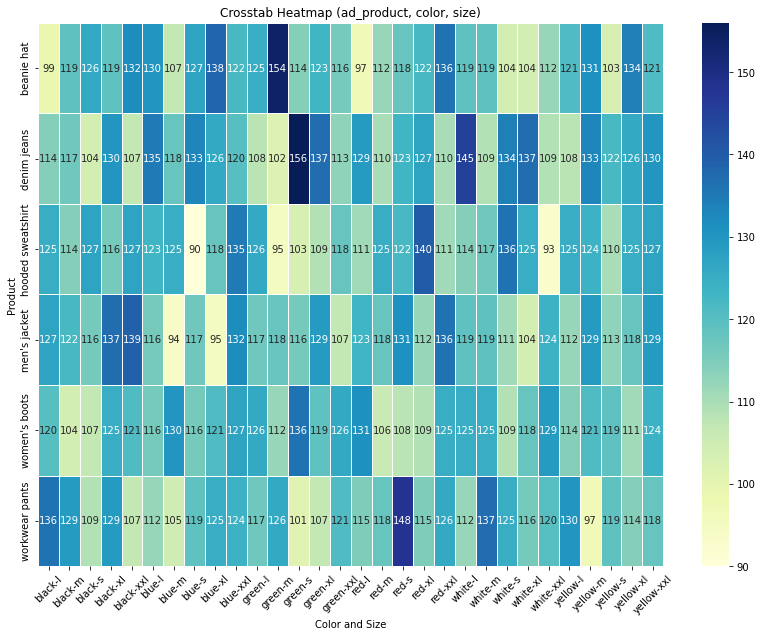

In [16]:
# Plot crosstabulation of ad_product, color, and size
plt.figure(figsize=(14, 10))

sns.heatmap(crosstab_product_attr, annot=True, cmap='YlGnBu', fmt='d', linewidths=0.5)
plt.title('Crosstab Heatmap (ad_product, color, size)')
plt.xlabel('Color and Size')
plt.ylabel('Product')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

Seems eveny distributed.

In [86]:
crosstab_product_last_channel = pd.crosstab(index=marketing_data['ad_product'], columns=[marketing_data['last_touch_channel']])

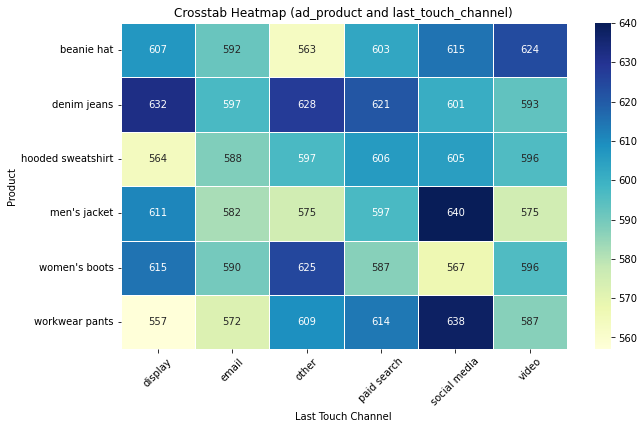

In [87]:
# Plot crosstabulation of ad_product and last_touch channel
plt.figure(figsize=(10, 6))

sns.heatmap(crosstab_product_last_channel, annot=True, cmap='YlGnBu', fmt='d', linewidths=0.5)
plt.title('Crosstab Heatmap (ad_product and last_touch_channel)')
plt.xlabel('Last Touch Channel')
plt.ylabel('Product')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

Seems eveny distributed.

In [19]:
key_candidates = ['campaign_category', 'ad_group', 'ad_product', 'size', 'color', 'device', 'subchannel']

# Call the function to count duplicate rows for all possible column combinations
duplicate_counts = primary_key_candidates(marketing_data[key_candidates])

# Display the count of duplicate rows for each column combination
for column_combination, num_duplicates in duplicate_counts.items():
    print(f'Columns: {column_combination}')
    print(f'Number of Duplicate Rows: {num_duplicates}')
    print('-----')

Columns: ('campaign_category', 'ad_group')
Number of Duplicate Rows: 21569
-----
Columns: ('campaign_category', 'ad_product')
Number of Duplicate Rows: 21569
-----
Columns: ('campaign_category', 'size')
Number of Duplicate Rows: 21569
-----
Columns: ('campaign_category', 'color')
Number of Duplicate Rows: 21569
-----
Columns: ('campaign_category', 'device')
Number of Duplicate Rows: 21569
-----
Columns: ('campaign_category', 'subchannel')
Number of Duplicate Rows: 21569
-----
Columns: ('ad_group', 'ad_product')
Number of Duplicate Rows: 21569
-----
Columns: ('ad_group', 'size')
Number of Duplicate Rows: 21569
-----
Columns: ('ad_group', 'color')
Number of Duplicate Rows: 21569
-----
Columns: ('ad_group', 'device')
Number of Duplicate Rows: 21569
-----
Columns: ('ad_group', 'subchannel')
Number of Duplicate Rows: 21569
-----
Columns: ('ad_product', 'size')
Number of Duplicate Rows: 21569
-----
Columns: ('ad_product', 'color')
Number of Duplicate Rows: 21569
-----
Columns: ('ad_product',

 With 84% missing values for campaign name, retail tier, retail campaign typer, it seems too risky to run an imputation algorithm. There are too many duplicates to use any combination of the features as primary keys. Features that can potentially indicate any differences are spread out evenly based on the crosstabulations. Thus, it is not clear what makes a row Tier x or have a campign type of 'in-store' or 'online'. It is also unclear how to identify the correct name. I would consult the marketing teams on how to differentiate the ads. However, since, we will be focusing on calculations for marketing channels and campaigns at a high level, campaign category would suffice in the absence of campaign name and retail campaign type. Retail tier remains unclear. I will look into it and figure out better ways to identify each ad. For now, we will remove campaign name, retail campaign type, and retail tier. 

In [20]:
# Remove 'campaign_name', 'retail_tier' and 'retail_campaign_type'
marketing_data = marketing_data.drop(columns=['campaign_name', 'retail_tier', 'retail_campaign_type'], axis=1)

# Exploratory Data Analysis

In [21]:
# Select only numerical columns
numerical_columns = marketing_data.select_dtypes(include=['int64','float'])
numerical_columns.head()

,spend,revenue,visits,impressions,clicks,conversions,pageviews,unique_visitors,upo,video_spend,video_impressions,link_clicks,engagements,video_views,video_completions
0,237.50,621.41,1597,49878,23,0,4233,1353,1.3,0.00,0,0,0,0,0
1,896.28,2306.10,895,11735,509,87,1874,775,2.9,0.00,0,0,0,0,0
2,1.00,3.14,1129,0,784,0,2563,932,1.4,199.77,1,160,1,1313,1
3,14.41,41.70,2416,52611,1,0,10823,1994,1.5,0.00,0,0,0,0,0
4,103.12,356.07,1313,41847,1,396,3750,1218,2.6,0.00,0,0,0,0,0


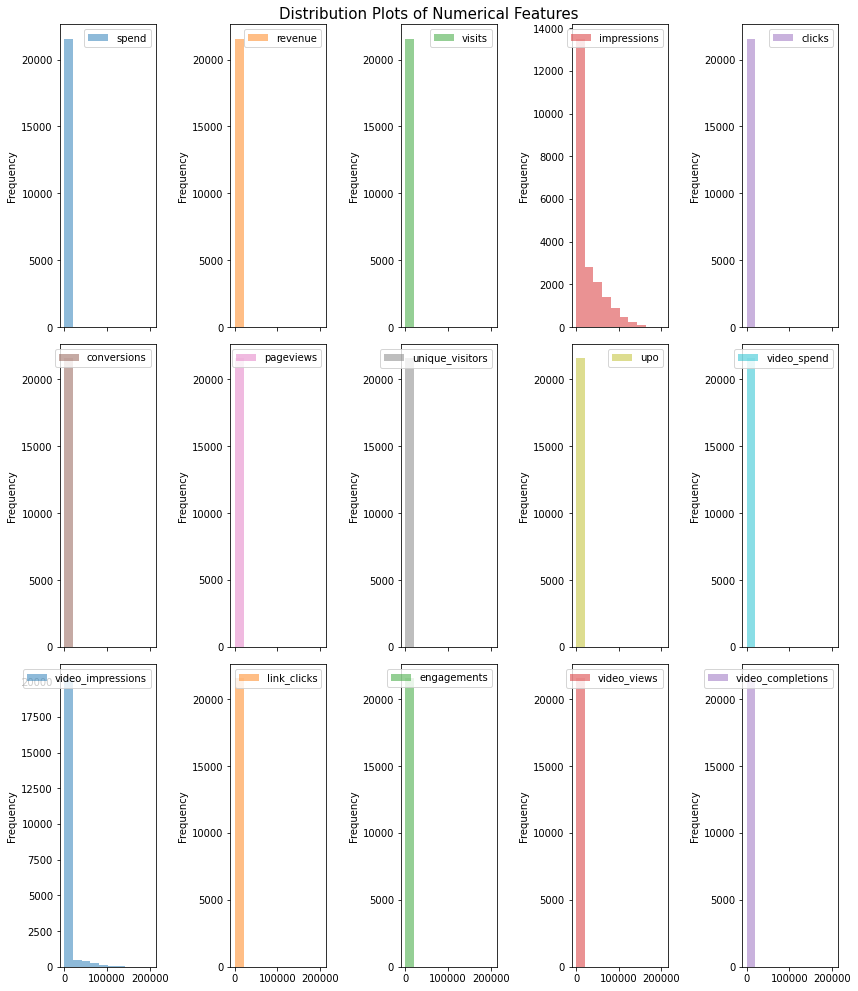

Text(0.5, 0.9, 'Boxplots of Numerical Faeatures')

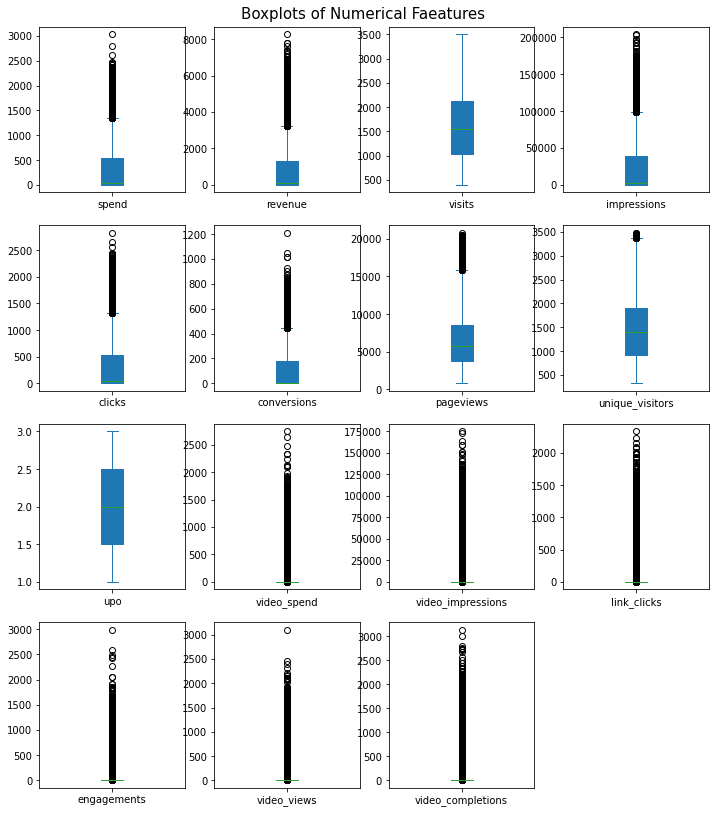

In [22]:
# Plot distributions
numerical_columns.plot(subplots=True, layout=(3, 5), kind='hist', figsize=(12, 14), alpha=0.5)
plt.suptitle('Distribution Plots of Numerical Features', fontsize=15)
plt.tight_layout()
plt.show()

# Plot boxplots
numerical_columns.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Boxplots of Numerical Faeatures', fontsize=15, y=0.9)
# plt.savefig('boxplots.png', bbox_inches='tight')

All features are highly skewed and contain outliers. Best to use medians over means for future reference.

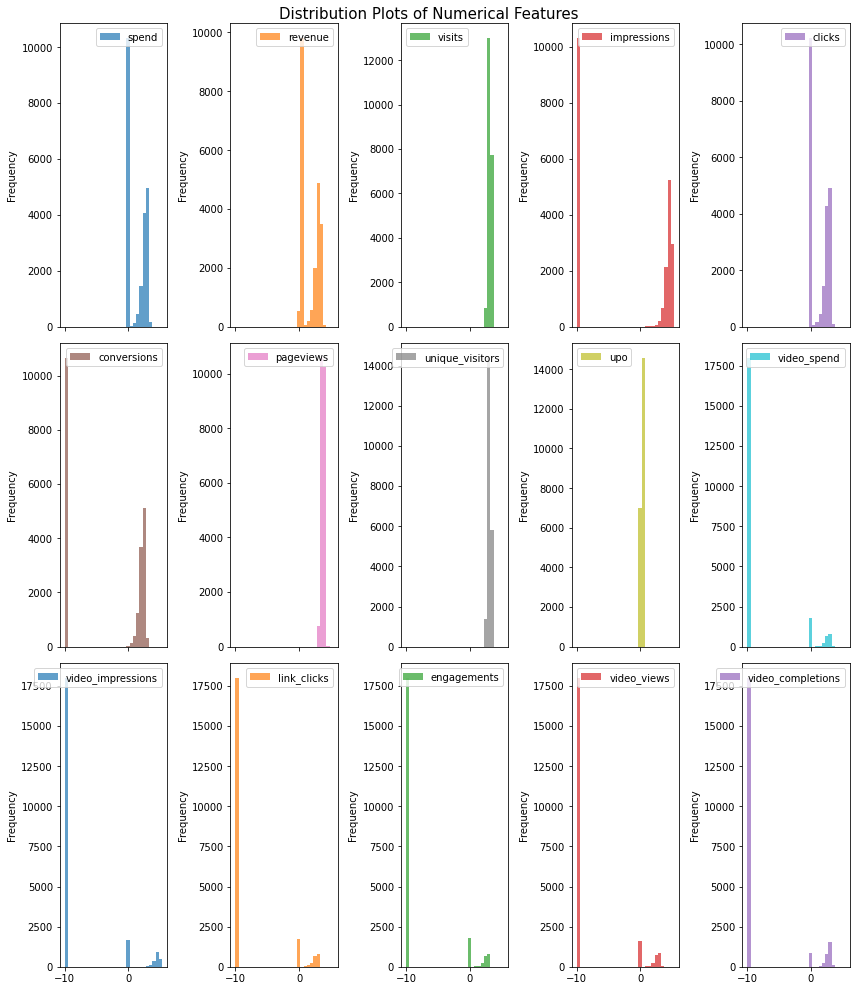

In [23]:
# Transform skewed data
log_columns = np.log10(numerical_columns + 1e-10)

# Plot distributions
log_columns.plot(subplots=True, layout=(3, 5), kind='hist', figsize=(12, 14), bins=30, alpha=0.7)
plt.suptitle('Distribution Plots of Numerical Features', fontsize=15)
plt.tight_layout()
plt.show()

There are many small values such as 0s and 1s while there also exists a handful of large values which represent the islands in the histograms.

In [24]:
# Exploring counts of campaign categories
marketing_data['campaign_category'].value_counts()


general              14268
retail                3405
spring essentials     1681
summer collection     1155
winter clearance      1060
Name: campaign_category, dtype: int64

In [25]:
# Exploring counts of ad groups
marketing_data['ad_group'].value_counts()

pants        7249
outerwear    7136
hats         3604
footwear     3580
Name: ad_group, dtype: int64

### New Features

We can split up date by month, day, and year and subchannel by subchannel and content for easier analysis.

In [26]:
# Set date to datetime
marketing_data['date'] = pd.to_datetime(marketing_data['date'], format='%m/%d/%Y')

In [27]:
# Create new features
marketing_data['year'] = marketing_data.date.dt.year
marketing_data['month'] = marketing_data.date.dt.month
marketing_data['day'] = marketing_data.date.dt.day
marketing_data['content'] = marketing_data['subchannel'].apply(lambda x: x.split('-')[1] if '-' in x else 'unknown')
marketing_data['subchannel'] = marketing_data['subchannel'].apply(lambda x: x.split('-')[0])


In [111]:
# Test
marketing_data.head()

,date,spend,revenue,visits,impressions,clicks,conversions,pageviews,unique_visitors,upo,campaign_category,ad_group,ad_product,last_touch_channel,size,color,device,subchannel,video_spend,video_impressions,link_clicks,engagements,video_views,video_completions,year,month,day,content,pageviews_per_unique_visitor,conversion_rate,profit
0,2020-08-10,237.50,621.41,1597,49878,23,0,4233,1353,1.3,general,outerwear,hooded sweatshirt,other,l,blue,tablet,other,0.00,0,0,0,0,0,2020,8,10,unknown,3.128603,0.000000,383.91
1,2020-08-10,896.28,2306.10,895,11735,509,87,1874,775,2.9,general,hats,beanie hat,social media,m,yellow,desktop,paidsocial,0.00,0,0,0,0,0,2020,8,10,branding,2.418065,0.112258,1409.82
2,2020-08-10,1.00,3.14,1129,0,784,0,2563,932,1.4,general,hats,beanie hat,video,l,blue,tablet,video,199.77,1,160,1,1313,1,2020,8,10,branding,2.750000,0.000000,2.14
3,2020-08-10,14.41,41.70,2416,52611,1,0,10823,1994,1.5,general,outerwear,men's jacket,social media,xxl,red,tablet,paidsocial,0.00,0,0,0,0,0,2020,8,10,prospecting,5.427783,0.000000,27.29
4,2020-08-10,103.12,356.07,1313,41847,1,396,3750,1218,2.6,general,hats,beanie hat,social media,s,red,mobile,paidsocial,0.00,0,0,0,0,0,2020,8,10,branding,3.078818,0.325123,252.95


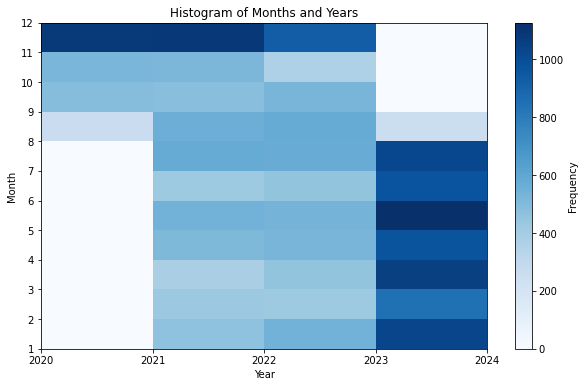

In [29]:
# Plot histogram of Year and Month
plt.figure(figsize=(10, 6))
plt.hist2d(marketing_data['year'], marketing_data['month'], bins=[range(2020, 2025), range(1, 13)], cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('Histogram of Months and Years')
plt.xlabel('Year')
plt.ylabel('Month')
plt.xticks(range(2020, 2025))
plt.yticks(range(1, 13))
plt.show()

It's clear that ads in 2023 has significantly higher volume than the rest. This will be our main focus of the analysis.

In [30]:
# Save the cleaned ad modifed CSV file
csv_filename = 'cleaned_marketing_data.csv'
marketing_data.to_csv(csv_filename, index=False)
print(f'CSV file "{csv_filename}" has been created')

CSV file "cleaned_marketing_data.csv" has been created


### Correlation Analysis

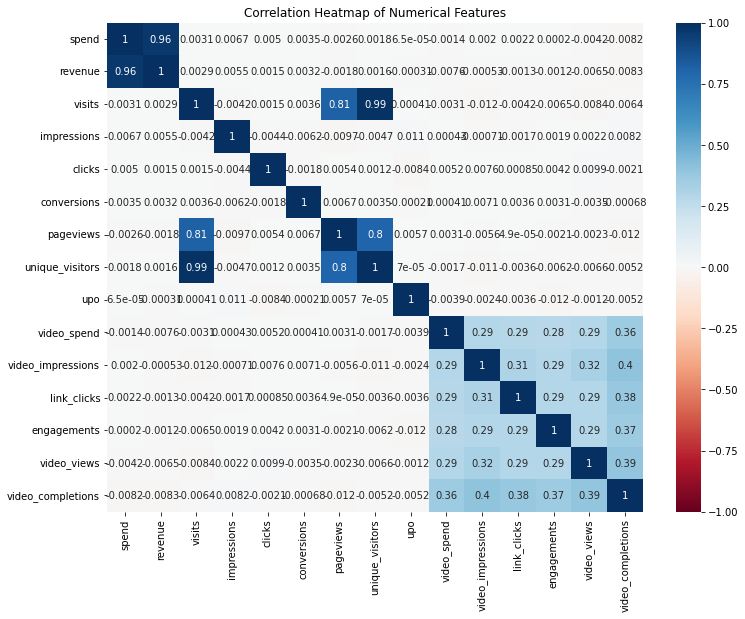

In [31]:
# Plot correlation table for numerical data
correlation_matrix = numerical_columns.corr()

# Label Plot
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

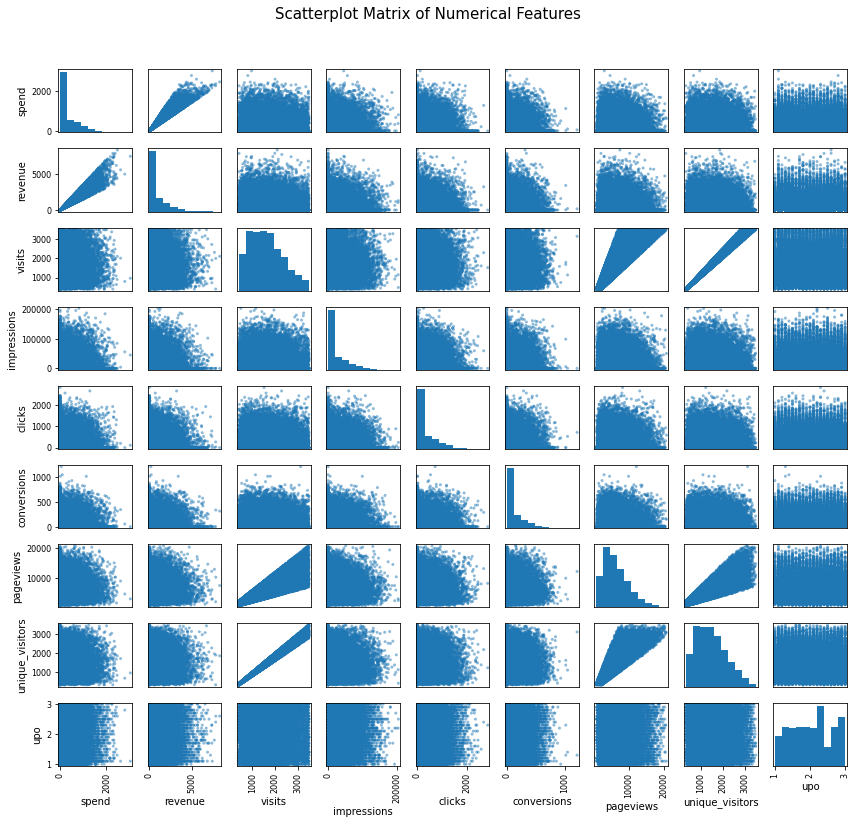

In [32]:
# Visualize scatter plots
pd.plotting.scatter_matrix(numerical_columns.drop(numerical_columns.columns[-6:], axis=1), figsize=(12, 12), alpha=0.5)
plt.suptitle('Scatterplot Matrix of Numerical Features', fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust suptitle position
plt.show()

### Patterns
1. Revenue and spend have a strong positive linear correlation 
2. Page views and unique visitors tend to increase as vists increase which makes sense
2. Page views tend to increase as unique visitors increase which also makes since one unique visit guarantees one page view
4. Video metrics all have a weak positive trends with one another

### Anomalies
1. No linear connections between revenue and metrics (visits, impressions, clicks, conversions, page views, and unique visitors) 
2. No linear connections between spend and metrics (visits, impressions, clicks, conversions, page views, and unique visitors) 
3. Moderate positive linear connections between the video metrics

Intuitively, there should be at least some linear conections to metrics like conversions and revenue (more conversions mean more desired outcomes like purchadses) or spend and impressions (more ad spend means more ads generated). Similarly, video views and vdeo completions would intuitevly have a stronger linear connection since one completion should be one view. However, it is also possible, that people are skipping to the end quick enough to not be being considered a view. Should also consider the fact that this data set has fake data.

## Overall Marketing Performance 

In [96]:
# Load profit data per year
profit_subchannel_year = load_sql_data('sql_exports/profit_subchannel_year.csv')

In [100]:
# Test
profit_subchannel_year

,subchannel,year,profit
0,paidsearch,2023.0,601005.76
1,display,2023.0,600943.89
2,other,2023.0,579760.40
3,affiliates,2023.0,570486.95
4,paidsocial,2023.0,552278.32
5,video,2023.0,531045.68
6,affiliates,2021.0,515725.93
7,other,2022.0,506380.02
8,display,2021.0,489165.25
9,paidsocial,2022.0,485805.74


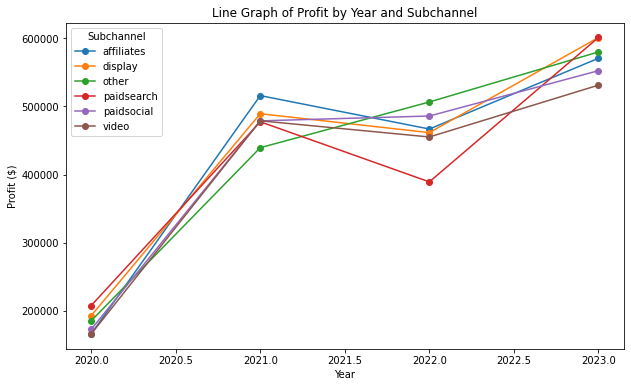

In [98]:
# Plot line chart for profit by subchannel and year
pivot_df = profit_subchannel_year.pivot(index='year', columns='subchannel', values='profit')
pivot_df.plot(kind='line', marker='o', figsize=(10, 6))

# Add labels
plt.xlabel('Year')
plt.ylabel('Profit ($)')
plt.title(f'Line Graph of Profit by Year and Subchannel')
plt.legend(title='Subchannel')

We have more than doubled the profit for each subchannel since 2020 except for paidsearch. This aligns with the ad volume increase in ads in 2023 as seen in the dates histogram. It also aligns with strong positive correlation between revenue and spend with a coefficient of 0.96. As the business nvests more into the marketing strategies, it gets proportional increase in revenue.

In [101]:
# Load data for top 5 subchannels based on ROI
top_5_channels = load_sql_data('sql_exports/roi_subchannel_alltime.csv')

In [104]:
# Test
top_5_channels

,subchannel,roi
0,display,1.542405
1,affiliates,1.513335
2,other,1.494543
3,paidsearch,1.489149
4,paidsocial,1.472542
5,video,1.469752


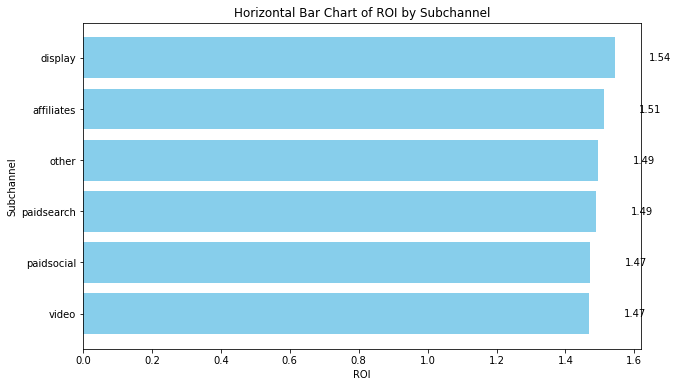

In [110]:
# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_5_channels['subchannel'], top_5_channels['roi'], color='skyblue')

# Add data values to the bars
for index, value in enumerate(top_5_channels['roi']):
    plt.text(value + 0.1, index, f'{value:.2f}', va='center')

# Add labels and title
plt.xlabel('ROI')
plt.ylabel('Subchannel')
plt.title('Horizontal Bar Chart of ROI by Subchannel')
plt.gca().invert_yaxis()  # Invert y-axis to have highest ROI at the top
plt.show()

In [70]:
roi_subchannel_year = load_sql_data('sql_exports/roi_subchannel_year.csv')

In [71]:
# Test
roi_subchannel_year.sample(5)

,subchannel,year,roi
21,other,2020.0,1.465036
4,affiliates,2021.0,1.518797
0,display,2020.0,1.569530
19,paidsearch,2022.0,1.474238
5,affiliates,2020.0,1.518225


In [72]:
# Group by subchannel and calculate min and max ROI for each group
roi_2020_2023 = roi_subchannel_year.groupby('subchannel')['roi'].agg(['min', 'max'])

# Calculate the percentage change of ROI from min year to max year
roi_2020_2023['percentage_change'] = ((roi_2020_2023['max'] - roi_2020_2023['min']) / roi_2020_2023['min']) * 100

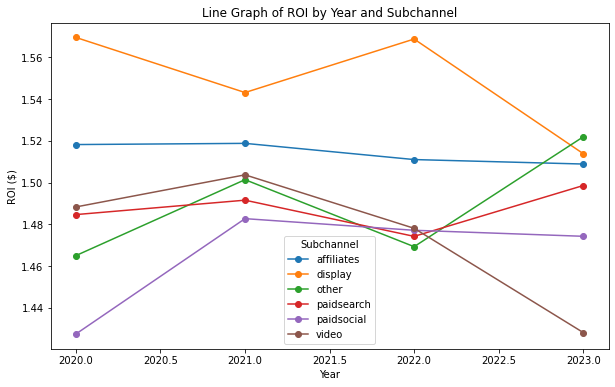

In [73]:
# Clean data
roi_subchannel_year['year'] = roi_subchannel_year['year'].astype(int)

# Plot line chart for ROI by subchannel and year
pivot_df = roi_subchannel_year.pivot(index='year', columns='subchannel', values='roi')
pivot_df.plot(kind='line', marker='o', figsize=(10, 6))

# Add labels
plt.xlabel('Year')
plt.ylabel('ROI')
plt.title(f'Line Graph of ROI by Year and Subchannel')
plt.legend(title='Subchannel')

We may have great net returns but we can see drops in efficiency in the display subchannel and video subchannel. This decrease in return on ad spend for these subchannels will be explored through the anaysis of customer behavior metrics for each level of the marketing funnel (Acquision: Top, Consideration: Middle, and Conversion: Bottom). 

Furthermore, the most efficient channel is the "other" subchannel and the least efficient subchanel is "video".

In [39]:
# Load ROAS SQL queries
roas_subchannel_alltime = load_sql_data('sql_exports/roas_subchannel_alltime.csv')
roas_subchannel_year= load_sql_data('sql_exports/roas_subchannel_year.csv')
roas_year_month= load_sql_data('sql_exports/roas_year_month.csv')

In [40]:
# Clean columns
roas_subchannel_alltime['roas'] = roas_subchannel_alltime['roas'].round(2)
roas_subchannel_year['year'] = roas_subchannel_year['year'].astype(int)
roas_year_month['year'] = roas_year_month['year'].astype(int)
roas_year_month['month'] = roas_year_month['month'].astype(int)

# Tests
print(roas_subchannel_alltime)
print(roas_subchannel_year.sample(5))
print(roas_year_month.sample(5))

   subchannel  roas
0     display  2.54
1  affiliates  2.51
2       other  2.49
3  paidsearch  2.49
4  paidsocial  2.47
5       video  2.47
    year  subchannel      roas
6   2023     display  2.513874
8   2023  affiliates  2.508893
0   2020     display  2.569530
12  2021  paidsearch  2.491577
13  2020       video  2.488339
    year  month      roas
30  2023      6  2.461656
24  2020     12  2.471254
32  2020      8  2.446085
14  2022      3  2.508070
7   2023      7  2.543761


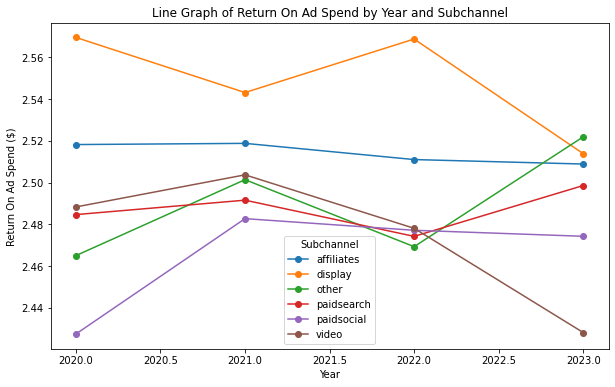

In [41]:

# Plot line chart for ROI by subchannel and year
pivot_roas_year = roas_subchannel_year.pivot(index='year', columns='subchannel', values='roas')
pivot_roas_year.plot(kind='line', marker='o', figsize=(10, 6))

# Add labels
plt.xlabel('Year')
plt.ylabel('Return On Ad Spend ($)')
plt.title(f'Line Graph of Return On Ad Spend by Year and Subchannel')
plt.legend(title='Subchannel')

I decided to use return on ad spend (ROAS) instead of ROI because its interpretation is more intutive to me.

## Display Subchannel Analysis

In [42]:
# Load SQL Query
display_metrics_year = load_sql_data('sql_exports/display_metrics_year.csv')

In [43]:
# Test
display_metrics_year.head()

,year,subchannel,content,cost_per_impression,cost_per_click,click_thru_rate,cost_per_visit,avg_pages_per_visit,clicks_to_visit,conversion_rate,roi,roas
0,2023.0,display,retargeting,0.011229,0.918208,1.222872,0.229788,4.563910,22.493857,8.442710,285638.30,2.505657
1,2021.0,display,retargeting,0.015447,1.234358,1.251410,0.221470,4.327224,16.175591,6.927768,267470.28,2.564307
2,2022.0,display,retargeting,0.012941,1.043428,1.240280,0.211353,4.394399,18.260110,6.469527,237135.90,2.587476
3,2022.0,display,prospecting,0.013971,1.115456,1.252460,0.202674,4.442950,16.405749,6.674844,224288.53,2.549484
4,2021.0,display,prospecting,0.012253,0.994967,1.231499,0.196609,4.525494,17.730469,6.866612,221694.97,2.518361


In [44]:
# Clean data 
display_metrics_year['year'] = display_metrics_year['year'].astype(int)
columns_round = ['cost_per_impression', 'cost_per_click', 'click_thru_rate', 'cost_per_visit', 'avg_pages_per_visit', 'clicks_to_visit', 'conversion_rate', 'roas']
display_metrics_year[columns_round] = display_metrics_year[columns_round].round(2)
display_metrics_year

,year,subchannel,content,cost_per_impression,cost_per_click,click_thru_rate,cost_per_visit,avg_pages_per_visit,clicks_to_visit,conversion_rate,roi,roas
0,2023,display,retargeting,0.01,0.92,1.22,0.23,4.56,22.49,8.44,285638.30,2.51
1,2021,display,retargeting,0.02,1.23,1.25,0.22,4.33,16.18,6.93,267470.28,2.56
2,2022,display,retargeting,0.01,1.04,1.24,0.21,4.39,18.26,6.47,237135.90,2.59
3,2022,display,prospecting,0.01,1.12,1.25,0.20,4.44,16.41,6.67,224288.53,2.55
4,2021,display,prospecting,0.01,0.99,1.23,0.20,4.53,17.73,6.87,221694.97,2.52
5,2023,display,prospecting,0.02,1.04,1.50,0.24,4.57,20.47,8.11,315305.59,2.52


### Acquisition Metrics

In [45]:
# Number of impressions per year by subchannel and content
num_impressions = marketing_data[(marketing_data['subchannel'] == 'display')]
num_impressions.groupby(['year','subchannel','content'])['impressions'].sum()

year  subchannel  content    
2020  display     prospecting     4551526
                  retargeting     4294317
2021  display     prospecting    11916207
                  retargeting    11069111
2022  display     prospecting    10361046
                  retargeting    11542714
2023  display     prospecting    13290307
                  retargeting    16895396
Name: impressions, dtype: int64

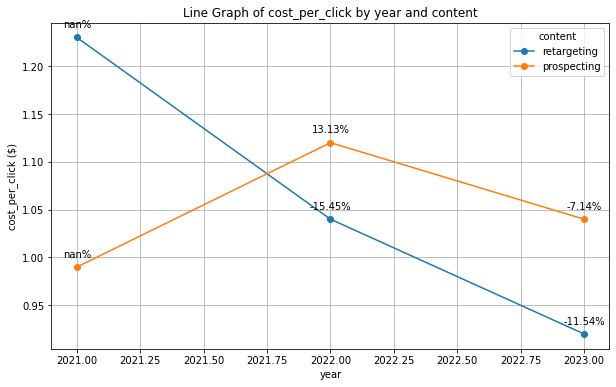

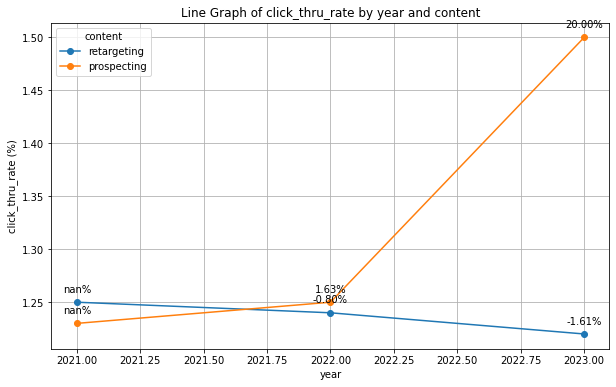

In [46]:
# Plot line graphs of acquisition metrics for display subchannel
generate_line_graph(display_metrics_year, 'year', 'cost_per_click', '$', 'content', ['retargeting', 'prospecting'])
generate_line_graph(display_metrics_year, 'year', 'click_thru_rate', '%', 'content', ['retargeting', 'prospecting'])

We are spending $1.04 per click on prospecting ads in 2023, which is 12 cents more than retargeting ads. There do not seem to be any large differences between the two content types. The cost per click for both ads is more or less a dollar. And based on the cost per click chart, both kinds of display ads generates at least one click for every impression since both kinds of content receive a click through rate greater than 100%. Prospecting ads have a higher click through rate by a little over 25%. This is a good sign since there it is generating awareness and curiosity. 

### Consideration Metrics

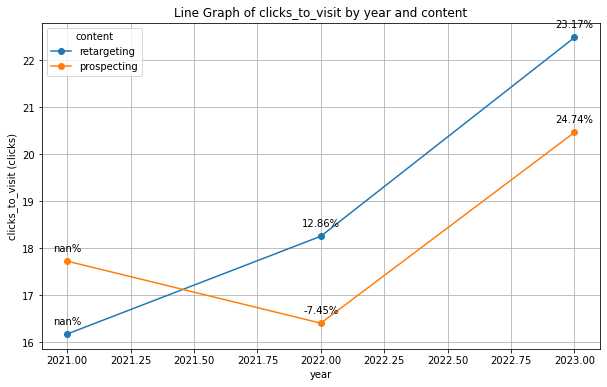

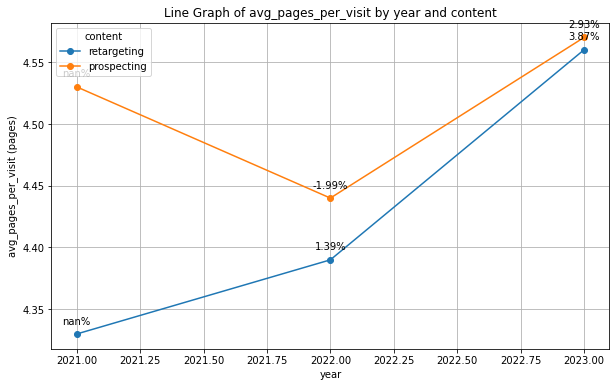

In [47]:
# Plot line graph for Cosideration metrics for display subchannel
generate_line_graph(display_metrics_year, 'year', 'clicks_to_visit', 'clicks', 'content', ['retargeting', 'prospecting'])
generate_line_graph(display_metrics_year, 'year', 'avg_pages_per_visit', 'pages', 'content', ['retargeting', 'prospecting'])

Taking a look at the clicks to visit chart, we can see that it takes around two more clicks on average to generate a visit for retargeting display ads than it does for prospecting display ads in 2023. The average page views per visit for all display ads are around the same which is around 4 to 5 pages per visit. Not much change since 2021. Overall, the two content types are performing at a similar level in terms of consideration metrics.

### Conversion Metrics

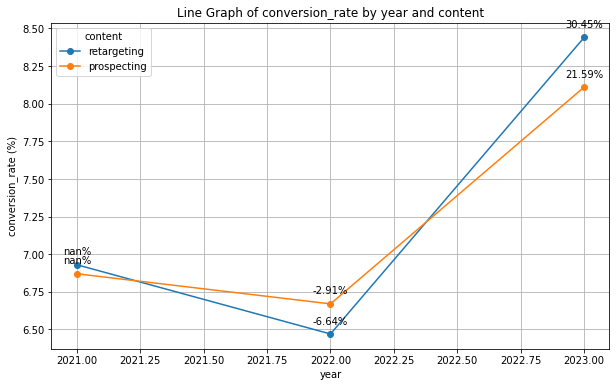

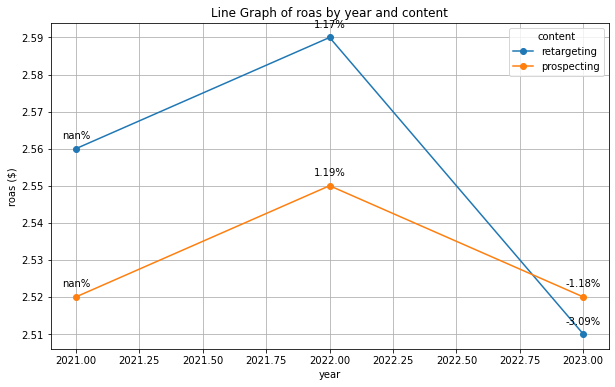

In [48]:
# Plot line graphs of conversion metrics for display subchannel
generate_line_graph(display_metrics_year, 'year', 'conversion_rate', '%', 'content', ['retargeting', 'prospecting'])
generate_line_graph(display_metrics_year, 'year', 'roas', '$', 'content', ['retargeting', 'prospecting'])

This is the interesting part. 2023 has the lowest return on ad spend for display ads but the conversion rate for display ads are the highest they have ever been in the last 3 years at over 8%. 

<b> Recommendation 1: </b>
<br/>
<br/>
One point of view is that this indicates the need to assess the quality and definition of conversions for this marketing channel. This can be done by evaluating the accuracy of different conversion tracking systems and by analyzing the extent to which the defined conversions bring high-value actions. We may be sacrificing profitability for volume here.

<b> Recommendation 2: </b>
</br> 
</br>
The other point of view is based on the insights in the acquisition metrics. The increase in prospecting's click through rate and number of clicks to view might not be generating an efficient amount of conversions or revenue for this channel at the moment but it is generating awareness and curiosity. Afterall, the definition of prospecting is targeting new customers that have not done business with Superbuy and retargeting is for people who have visited the site but not necessarily means they've made purchasdes before. It's possible potential conversions were missed due to bad timing (e.g. not having enough time to do shopping right now or can't commit to purchasing at the moment). The big question is now do these clicks translate to conversions later on? So one recommendation would be to investigate the correlation of metrics in this channel with the conversions or revenue of other channels. One question could be do the spend or clicks of display ads positively correlate with the conversions or revenue of other channels. Could it be that the conversions or revenue of other channels (especialy the "others" channel since it is not specific) can be attributed to the impressions or clicks of this channel?


## Video Subchannel Analysis

Text(0.5, 0.9, 'Boxplot for Video Features')

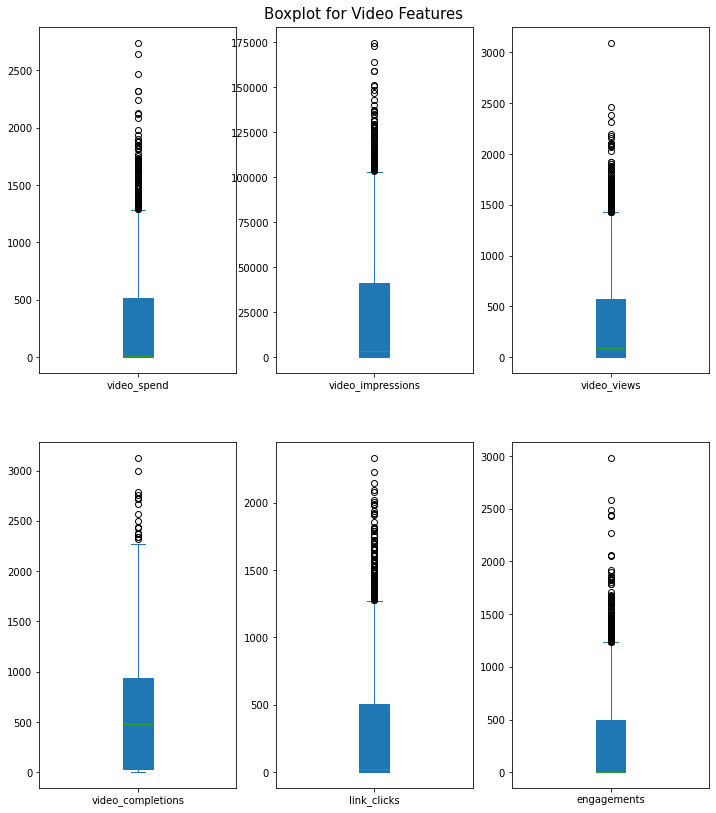

In [49]:
video_features = ['video_spend','video_impressions', 'video_views', 'video_completions', 'link_clicks', 'engagements']

# Filter for data that used video marketing
video_ads = marketing_data[(marketing_data['video_spend'] > 0)]
video_data = video_ads[video_features]

# Plot boxplots
video_data.plot(subplots=True, layout=(2,3), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Boxplot for Video Features', fontsize=15, y=0.9)

In [50]:
video_data.describe().T

,count,mean,std,min,25%,50%,75%,max
video_spend,3571.0,303.975710,433.913174,1.0,1.0,11.99,516.22,2741.07
video_impressions,3571.0,23236.276673,31809.654897,1.0,1.0,3434.00,41139.50,174721.00
video_views,3571.0,335.472697,448.251647,1.0,1.0,95.00,573.00,3097.00
video_completions,3571.0,580.562307,550.286141,1.0,30.0,480.00,936.00,3129.00
link_clicks,3571.0,294.203304,415.315657,1.0,1.0,27.00,508.50,2333.00
engagements,3571.0,289.206385,415.695839,1.0,1.0,4.00,495.50,2985.00


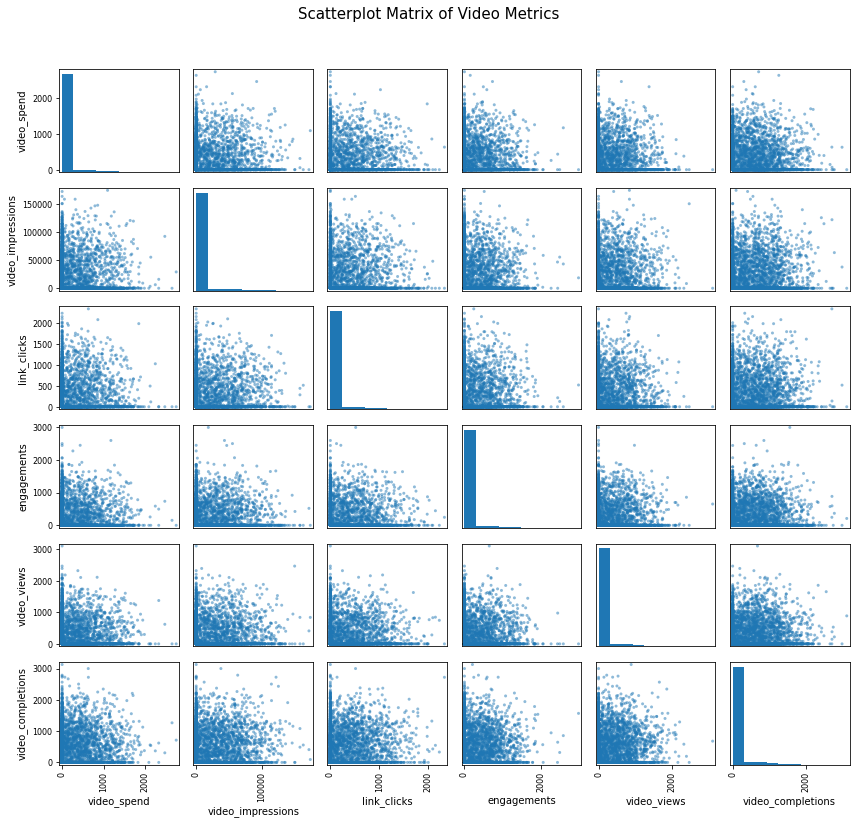

In [51]:
# Plot scatter plot of video metrics
pd.plotting.scatter_matrix(numerical_columns.drop(numerical_columns.columns[:9], axis=1), figsize=(12, 12), alpha=0.5)
plt.suptitle('Scatterplot Matrix of Video Metrics', fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust suptitle position
plt.show()

In [52]:
# Construct the relative path to the file
new_video_features_raw = load_sql_data('sql_exports/new_video_features.csv')
    

In [53]:
# Display new
new_video_features_raw.head()

,date,spend,revenue,visits,impressions,clicks,conversions,pageviews,unique_visitors,upo,campaign_category,ad_group,ad_product,last_touch_channel,size,color,device,subchannel,video_spend,video_impressions,link_clicks,engagements,video_views,video_completions,year,month,day,content,spend_per_view,view_rate,video_completion_rate,link_click_rate,roi,roas
0,2020-08-10 00:00:00,1.00,3.14,1129.0,0.0,784.0,0.0,2563.0,932.0,1.4,general,hats,beanie hat,video,l,blue,tablet,video,199.77,1.0,160.0,1.0,1313.0,1.0,2020.0,8.0,10.0,branding,0.152148,1313.000000,0.000762,0.121858,2.14,3.140000
1,2020-08-10 00:00:00,258.72,507.00,2092.0,15.0,1.0,97.0,10597.0,1699.0,1.5,general,pants,denim jeans,video,xxl,blue,desktop,video,1.00,104784.0,252.0,1.0,1.0,1124.0,2020.0,8.0,10.0,prospecting,1.000000,0.000010,1124.000000,252.000000,248.28,1.959647
2,2020-08-10 00:00:00,34.94,76.27,2085.0,0.0,1.0,0.0,6359.0,1830.0,2.4,general,pants,workwear pants,video,m,black,mobile,video,1.00,1.0,1.0,1.0,743.0,669.0,2020.0,8.0,10.0,branding,0.001346,743.000000,0.900404,0.001346,41.33,2.182885
3,2020-08-11 00:00:00,1.00,2.57,1060.0,9945.0,540.0,0.0,6095.0,991.0,2.6,general,outerwear,men's jacket,video,l,yellow,tablet,video,208.35,1.0,5.0,1.0,1.0,494.0,2020.0,8.0,11.0,prospecting,208.350000,1.000000,494.000000,5.000000,1.57,2.570000
4,2020-08-11 00:00:00,1.00,3.41,2194.0,0.0,321.0,370.0,5576.0,2085.0,2.4,general,pants,denim jeans,video,xl,green,desktop,video,1.00,3768.0,396.0,1.0,1.0,121.0,2020.0,8.0,11.0,prospecting,1.000000,0.000265,121.000000,396.000000,2.41,3.410000


In [54]:
# Make a copy
new_video_features = new_video_features_raw

In [55]:
video_analysis_features = ['revenue', 'roi', 'roas', 'spend', 'view_rate', 
                           'video_completion_rate', 'spend_per_view', 'link_click_rate']

video_plot_data = new_video_features[video_analysis_features]

In [56]:
basic_info(video_plot_data)

This dataset has  8  columns and  3571  rows.
This dataset has  1  duplicated rows.
 
Descriptive statistics of the numeric features in the dataset: 
 
           revenue          roi         roas        spend    view_rate  \
count  3571.000000  3571.000000  3571.000000  3571.000000  3571.000000   
mean    767.494046   456.736519     2.496395   310.757527   158.021398   
std    1140.368025   722.274303     0.581310   445.384419   346.190703   
min       1.500000     0.500000     1.500000     1.000000     0.000006   
25%       2.535000     1.530000     1.988088     1.000000     0.001152   
50%      47.700000    27.790000     2.482635    20.810000     0.086038   
75%    1251.490000   693.720000     3.000000   530.025000    57.000000   
max    7789.450000  5513.420000     3.500000  2426.850000  3097.000000   

       video_completion_rate  spend_per_view  link_click_rate  
count            3571.000000     3571.000000      3571.000000  
mean              263.805481      138.839384       13

Text(0.5, 0.9, 'Boxplot for New Video Features')

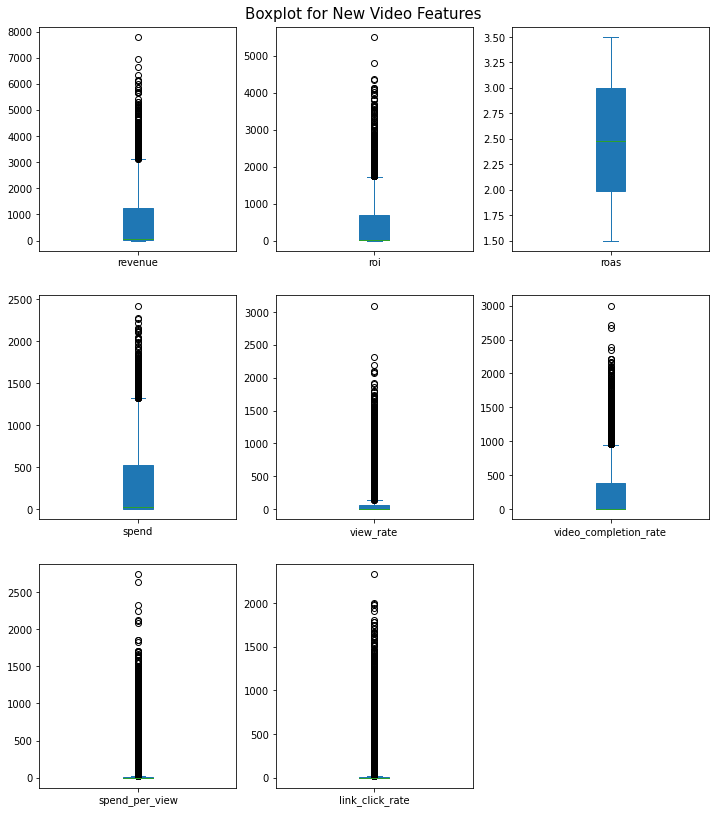

In [57]:
# Plot boxplots
video_plot_data.plot(subplots=True, layout=(3,3), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Boxplot for New Video Features', fontsize=15, y=0.9)

Still highly skewed.

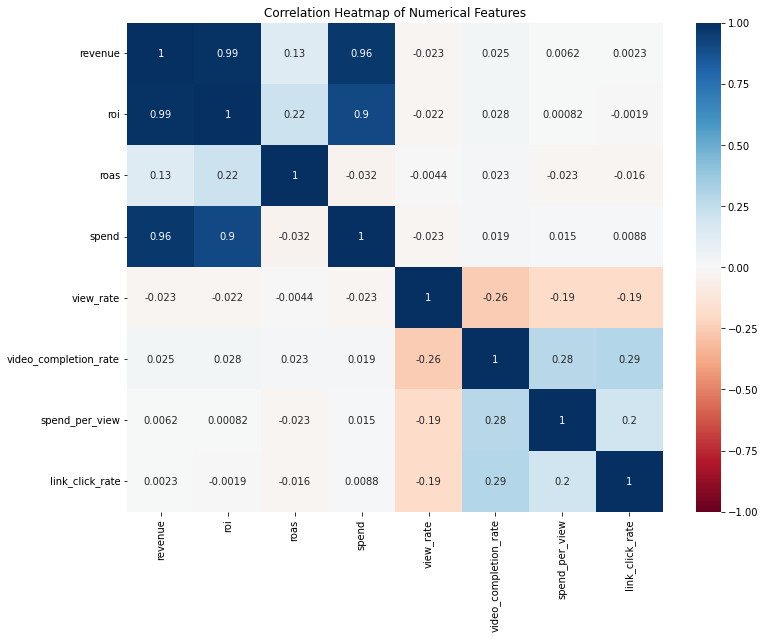

In [58]:
# Plot correlation table for numerical data
correlation_matrix = video_plot_data.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Patterns:
1. There are moderate negative linear connections where:
    - link click rate tends to decrease as view rate increases
    - spend per view tends to decrease as view rate increases
    - video completion_rate tends to decrease as view rate increases
2. There are moderate negative linear connections where:
    - video completion rate tends to increase as spend per view increases
    - link click rate tends to increase as spend per view increases

In [59]:
# Load data
video_performance_year = load_sql_data('sql_exports/video_metrics_subchannel_year.csv')

In [60]:
# Test
video_performance_year

,year,subchannel,content,spend_per_view,view_rate,video_completion_rate,link_click_rate,conversion_rate,roi,roas
0,2020.0,video,branding,0.848399,0.017018,1.466863,95.059978,0.050101,77256.81,2.476568
1,2020.0,video,prospecting,0.849786,0.014667,1.607962,87.757018,0.062761,88861.43,2.498726
2,2021.0,video,prospecting,0.963228,0.014366,1.802749,83.710959,0.074638,240657.75,2.489985
3,2021.0,video,branding,0.821150,0.015891,1.550369,82.737100,0.077238,238115.17,2.517857
4,2022.0,video,branding,0.851524,0.013417,1.843075,92.502834,0.071918,225541.09,2.418092
5,2022.0,video,prospecting,0.998504,0.013964,1.925671,93.123725,0.077276,229528.18,2.542233
6,2023.0,video,branding,0.833043,0.015574,1.728516,77.314975,0.068990,264013.28,2.462738
7,2023.0,video,prospecting,1.022993,0.012841,1.717230,95.126365,0.076750,267032.40,2.395572


In [61]:
# Clean Data
video_performance_year['year'] = video_performance_year['year'].astype(int)
video_performance_year['view_rate'] = video_performance_year['view_rate'] * 100
video_performance_year['video_completion_rate'] = video_performance_year['video_completion_rate'].round(2)
video_performance_year['link_click_rate'] = video_performance_year['link_click_rate'].round(2)
video_performance_year['roas'] = video_performance_year['roas'].round(2)

In [62]:
# Test
video_performance_year

,year,subchannel,content,spend_per_view,view_rate,video_completion_rate,link_click_rate,conversion_rate,roi,roas
0,2020,video,branding,0.848399,1.701752,1.47,95.06,0.050101,77256.81,2.48
1,2020,video,prospecting,0.849786,1.466677,1.61,87.76,0.062761,88861.43,2.50
2,2021,video,prospecting,0.963228,1.436558,1.80,83.71,0.074638,240657.75,2.49
3,2021,video,branding,0.821150,1.589064,1.55,82.74,0.077238,238115.17,2.52
4,2022,video,branding,0.851524,1.341694,1.84,92.50,0.071918,225541.09,2.42
5,2022,video,prospecting,0.998504,1.396363,1.93,93.12,0.077276,229528.18,2.54
6,2023,video,branding,0.833043,1.557446,1.73,77.31,0.068990,264013.28,2.46
7,2023,video,prospecting,1.022993,1.284075,1.72,95.13,0.076750,267032.40,2.40


### Acquisition Metrics

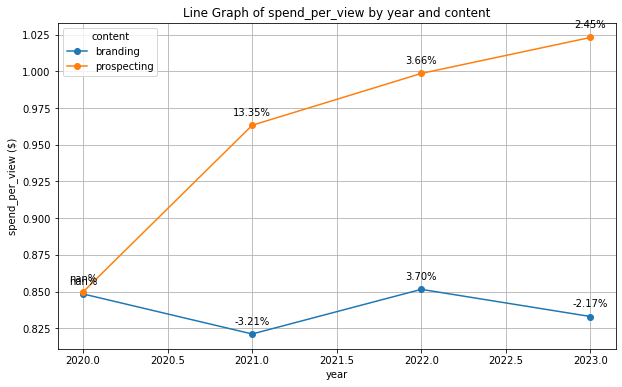

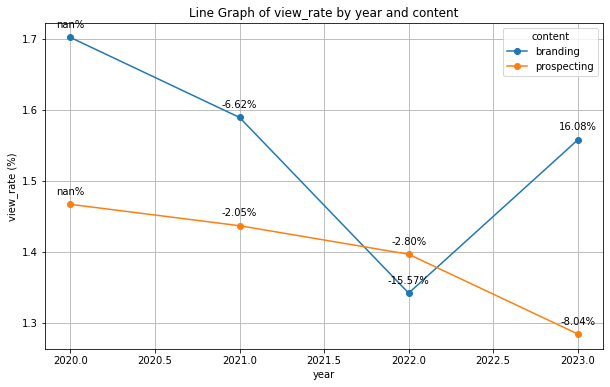

In [63]:
# Generate Line Charts for acquisition metrics
generate_line_graph(video_performance_year, 'year', 'spend_per_view', '$', 'content', ['branding','prospecting'])
generate_line_graph(video_performance_year, 'year', 'view_rate', '%', 'content', ['branding','prospecting'])

Our view rate for video prospecting is on the decline despite its increasing spend per view. This means we may need to make the thumbnails of the videos or first few seconds of the videos more compelling or enticing. Another possibility is that there is a customer targeting inefficiency for prospecting video ads and we may think we are targeting fresh customers who fit the description of our target market.

Even if we are spending 19 cents less per view on video branding in 2023 comapred to prospecting video, video branding is more spend efficient, as it yields a higher view rate than video prospecting in 2023. 

### Consideration Metrics

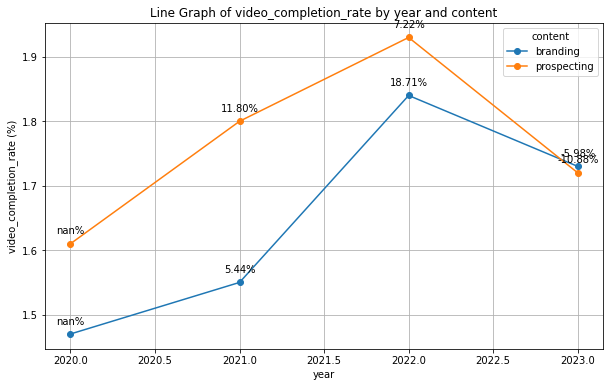

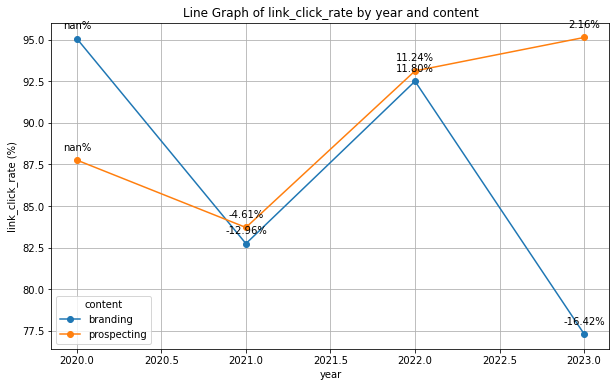

In [64]:
# Generate Line Charts for consideration metrics
generate_line_graph(video_performance_year, 'year', 'video_completion_rate', '%', 'content', ['branding','prospecting'])
generate_line_graph(video_performance_year, 'year', 'link_click_rate', '%', 'content', ['branding','prospecting'])

Since link click rate for prospecting has increased in 2023, achieving over 95% link click rate in 2023, the video content must be convincing and link placement could be efficient. On the other hand, the link click rate of video branding is down with 77.31% click rate in 2023. This signals the need for improvement in the video branding content, link placement, or video description.

Given the link click rate of prospecting videos are high, the decrease in video completion decrease may not be an issue. However, important messaging towards the end of these videos may need to be moved earlier in order for the message to get across. For video branding on the other hand, this raises concern since video branding would be targeted to to people who are more familiar and resonate to some degree with the business.


<b> Note: </b> I will refrain from analyzing video completion any further since I noticed too late that the sum of video completions are more than the sum of video views, creating percentages greater than 100%. This is likely caused by errors in data collection or people are skipping to the end of the video.

### Conversion Metrics

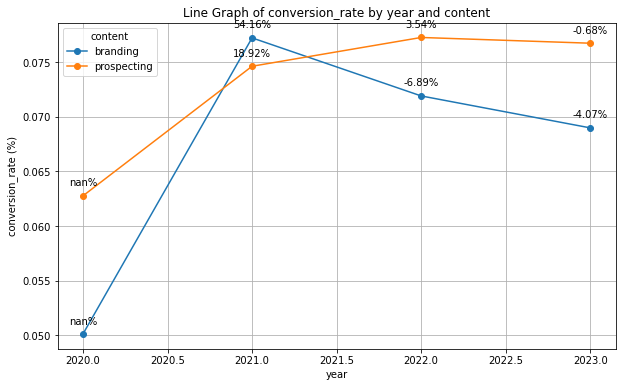

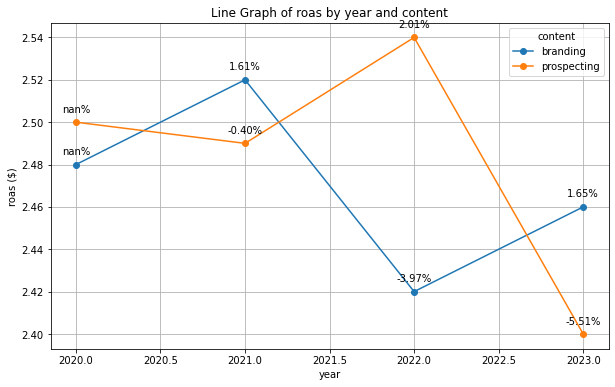

In [65]:
# Generate Line Charts for conversion metrics
generate_line_graph(video_performance_year, 'year', 'conversion_rate', '%', 'content', ['branding','prospecting'])
generate_line_graph(video_performance_year, 'year', 'roas', '$', 'content', ['branding','prospecting'])

While conversion rate for prospecting video has not changed signficantly from 2022, it does have a visible decrease in return on ad spend from 2022 to 2023. The high conversion rate indicates reifnorces the insights regarding the consideration and acquisition metrics in the sense that those who did view the video were compelled to click on the video link. But, with decreased view rates at the acquisition stage, there are missed opportunnities for more purchasesd. Hence, this may have caused the decrease in prospecting video return on ad spend.

On the other hand, the conversion rate of branding video is decreasing. This aligns with its dip in link click rate. Despite this, there is an increase in return on ad spend. Based on the definitioni of branding, it still makes sense that the conversion rate is going up for these ads because those who get targeted for video branding probably fit the profile of the existing target customer because they relate to the Superbuy brand and are probably familiar with it. 

Based on these insights, there are two ways I see opportunity for improvement.

<b> Recommendation 1: </b>

Initially, I defined prospecting video to be video ads that target people who are thought to be part of Superbuy's target market but have not done businiess with the brand. If this assumption is correct, then as mentioned in the acquisition insights, there may be a targeting inefficiency. I also mentioned that there may be an issue with the first glance of the prospecting video ads such as video thumbnail or the first few seconds of the video. These may not be as enticing to spark curiosity (i.e. video views) compared to previous campaigns and consequently, it may have caused a decrease in return on ad spend. One recommendation would be to run a customer segmentation analysis. We can compare the efficiency metrics for segments that are well-targeted but have lower video views with those that are well-targeted and have higher video views. Examples of some attributes to explore in the segmentation analysis could be geographic location, demographics, or device behavior. This can help us understand whether targeting or content is the primary driver of efficiency changes. 

<b> Recommendation 2: </b>

In the consideration stage, we identified a potential issue in branding content, supported by its decrease in conversion rate in the conversion stage. Another recommendation would be to improve its branding messaging and evaluate whether or not the messaging is still effective or if the message is exhausted. In other words, we need to gather insights as to how these videos are received at first glance, how many times a customer has seen an ad, and whether or not we need to refresh the messaging/content. This can be done using conventional customer surveys to gain insights on the content and initial level of curiosity from potential customers. From there, we can use the feed back to generate new content and A/B test them against the current prospecting video ads. Moreover, we can utilize data collection from platforms that provide people with feedback options that may provide insight on the relevancy on the ad or the frequency of its appearance to an individual.


## Project Reflection

Looking back, I realized prospecting video may have a different purpose: to expand the customer base into new markets. Instead of targeting potential new customers who fit the exisitng target market, prospecting could mean targeting new customers who are in different markets. If this is true, then it makes sense that there is a decrease in return on ad spend (efficiency) for the display and video subchannel because it may be that their purpose is to target new customer bases. Then, this purpose would explain the display ads' increase in conversion rate but decrease in return on ad spend because conversions may be defined for larger reach or expansion of the top of the marekting funnel. This would also make align with the insights in the video channel. The view rate of branding video is higher than prospecting video since it is more challenging to penetrate new markets and to convince them to consider Superbuy's products, leading to the decrease in return on ad spend for prospecting. Thus, it may be true that these results are more consistent with this perspective of prospecting being about targeting new customers. Now, it's a matter of the business objectives of Superbuy. Are they lookig to penetrate new markets or exhaust the current one.

If I had to re-do this project, I would not have only considered the marketing's financial objective of efficient spend and profits, but also considered marketing's objective of reach and awareness which may lead to more purchases in the future. It was an unfair comparison to compare spend efficiency between prospecting content and content like branding or retargeting because they have different purposes. 